# Clustering Exercise 1
The data here is the cereal_calories data which contains various attributes of different types of cereals from different manufacturers. The objective is to do clustering and try to infer information about the data.

## Explore Data
Printing the first 5 rows of the data

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from IPython.display import display
from matplotlib.pyplot import figure


data = pd.read_csv('cereal_calories.csv', header='infer')
data.head(5)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Summarize Data
View the mean, standard deviation, minimum and maximum of each of the attributes.

In [2]:
display(data.describe(include='all'))

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Count Chocula,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


## Handling Messy Data
From the output above we can see that carbo, sugars and potas attributes have negative minimum values of -1. Either these entries are errnous or they mean something. As we can't be sure so here I decided to eliminate rows that contain negative values for any attributes. The below given output shows which how many entries of the mentioned attributes contain -1.

In [3]:
display(print('\nAvailable -1 in different attributes'))
display((data==-1).sum())


Available -1 in different attributes


None

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

### Deleting row with -1 and NaN
* Replace -1 by NaN
* Show NaN values present in each attribute
* Delete rows with NaN

In [4]:
data2 = data.replace(-1, np.NaN)

print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))
    
print('Number of rows in original data = %d' % (data2.shape[0]))
data2 = data2.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of missing values:
	name: 0
	mfr: 0
	type: 0
	calories: 0
	protein: 0
	fat: 0
	sodium: 0
	fiber: 0
	carbo: 1
	sugars: 1
	potass: 2
	vitamins: 0
	shelf: 0
	weight: 0
	cups: 0
	rating: 0
Number of rows in original data = 77
Number of rows after discarding missing values = 74




### Duplicate Data
Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. Following is the code for detecting duplicate rows in the data. Seems like no duplicate et

In [5]:
dups = data2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Detect Outliers
For K-means algorithm it very important to filter outliers first. First I decided to do Box-and-Whisker Plots to visualize. The points that are outside the whiskers are 1.5 times different from the Q1 or Q3. Please see this [explanation](https://www.varsitytutors.com/hotmath/hotmath_help/topics/box-and-whisker-plots) for details.

The plots show that there are a lot of outliers in the dataset. Next I will eliminate them using standard deviation.

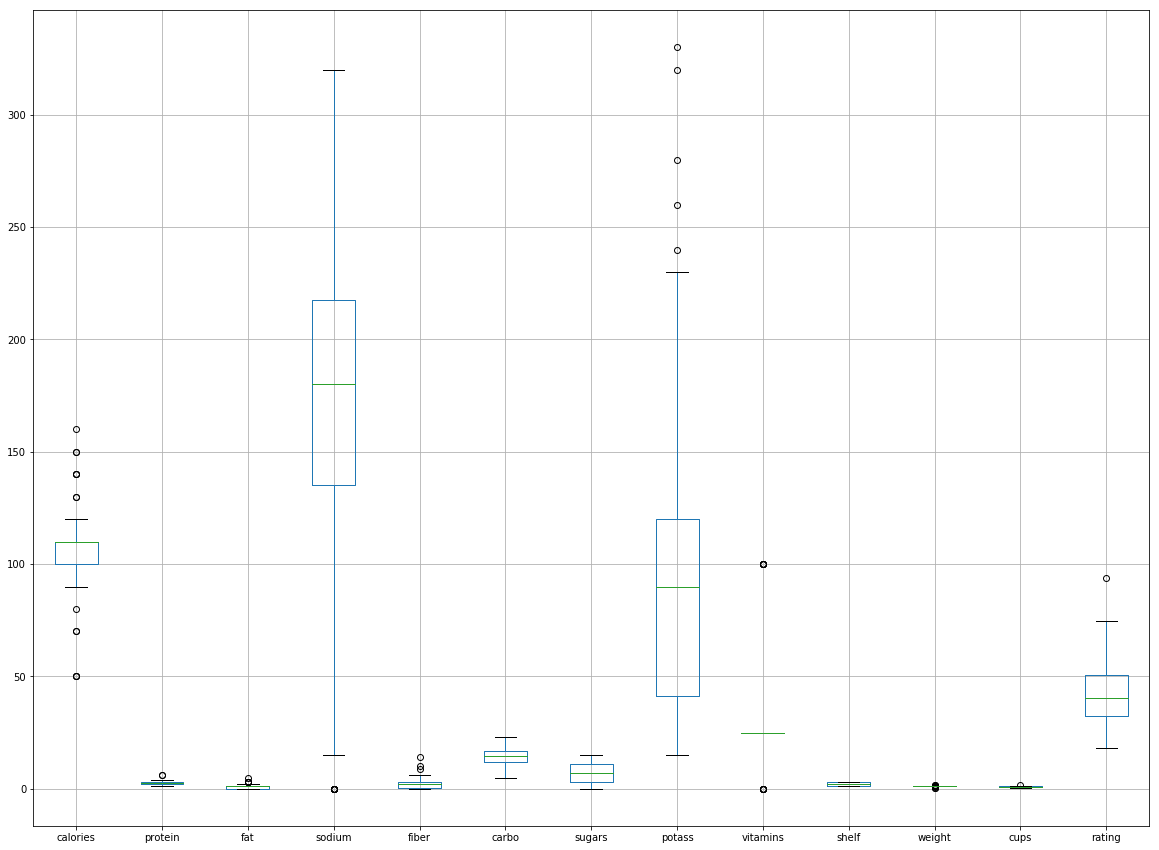

In [6]:
data2.boxplot(figsize=(20,15))

### Standardization and Outlier Elimination
The plots show that there are a lot of outliers in the dataset. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

##### Note: I first standardized the data. 
It would be great to experiment what happens if outliers are deleted before standardizing. As means of each attribute is effected by outliers so the standardized data will be effected by the outliers. In this particular case, as about 15 out of 74 observations or around 20% are deleted there might be a good possibility that doing normalization first is wrong.

#### Dropping Unnecessary Data
The columns: name, mfr and type are not needed to address the clustering problem so we are going to drop these clumns.

In [7]:
# Dropping unnecessary data
mfr_data = data2['mfr'] # Can be used
data2 = data2.drop(['name', 'mfr', 'type'], axis=1)
data2.head(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [8]:
print('Number of rows before discarding outliers = %d' % (data2.shape[0]))
dataZ = (data2-data2.mean())/data2.std()
data2 = dataZ.loc[((dataZ > -3).sum(axis=1)==13) & ((dataZ <= 3).sum(axis=1)==13),:]
print('Number of rows after discarding outliers = %d' % (data2.shape[0]))



Number of rows before discarding outliers = 74
Number of rows after discarding outliers = 59


In [9]:
# Updating mrf_data for future use
mfr_data = mfr_data.loc[((dataZ > -3).sum(axis=1)==13) & ((dataZ <= 3).sum(axis=1)==13)]
mfr_data = pd.DataFrame(mfr_data, columns=['mfr']);
print('Number of mfr data available: {}' .format(mfr_data.count()))

Number of mfr data available: mfr    59
dtype: int64


## Clustering (Finally)
I will try the following clustering approaches:
1. K-means (k= 2, 4)
2. Hierarchical Clustering  
    a. Single Link (MIN)  
    b. Complete Link (MAX)  
    c. Group Average  

### K-Means
Number of k is varied amid 2 and 4 to see the effects.

#### K = 2
It can be inferred that cluster 0 represents more healty products compared those represented by cluster 1. 
In c0, caloris are lower, protien is hiher 

In [10]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data2) 
labels = k_means.labels_
pd.DataFrame(labels, columns=['Cluster ID']); # In order to see the clustering as a table remove the ';'
centroids = k_means.cluster_centers_
print('k = 2 Centroids of the clusters:')
pd.DataFrame(centroids,columns=data2.columns)

k = 2 Centroids of the clusters:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0.036027,0.422223,0.128157,-0.363741,0.353464,0.061159,-0.180204,0.451057,-0.290361,0.282906,0.215494,-0.480387,0.411416
1,0.167816,-0.842507,-0.177361,0.389973,-0.691459,0.032740,0.466781,-0.775157,-0.181842,-0.646155,-0.200832,0.455240,-0.726532


Let's plot the centroid data to better understand.

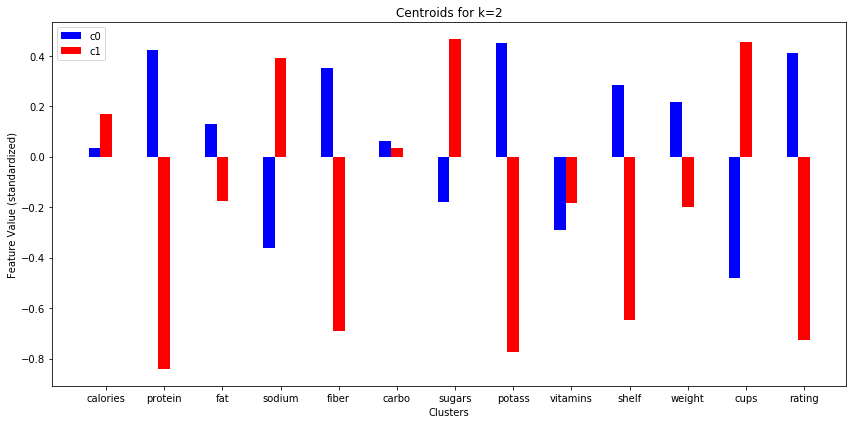

In [11]:
# data to plot
n_attributes = 13
 
# create plot
fig, ax = plt.subplots(figsize=(12, 6))
#figure(num=None, figsize=(8, 6))
index = np.arange(n_attributes)
bar_width = 0.2
opacity = 1
 
rects1 = plt.bar(index, centroids[0,:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='c0')
 

rects2 = plt.bar(index + bar_width, centroids[1,:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='c1')
 
plt.xlabel('Clusters')
plt.ylabel('Feature Value (standardized)')
plt.title('Centroids for k=2')
plt.xticks(index + bar_width, data2.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

C1 is less popular possibly due to having higer calories, lower (protein, fiber, potass and shelf life). The good qualities other than being opposite to c0 is that it has 

#### k=4
Now the same graph is presented for 4 clusters using k-means.

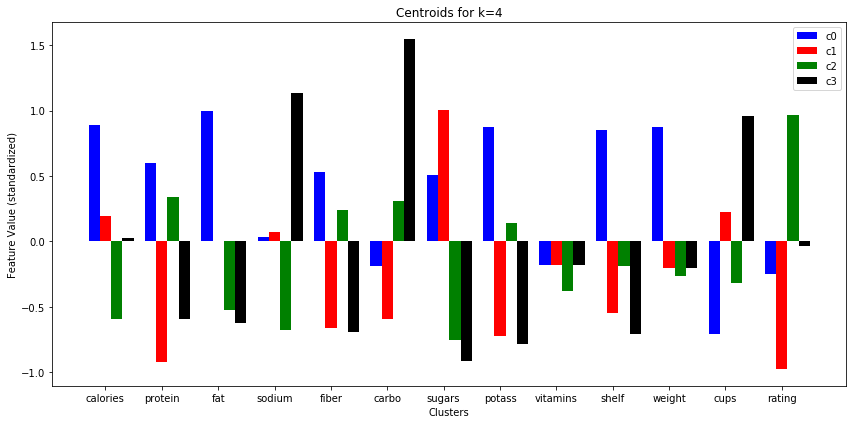

In [12]:
k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(data2) 
labels = k_means.labels_
pd.DataFrame(labels, columns=['Cluster ID']); 
centroids = k_means.cluster_centers_

 
# create plot
fig, ax = plt.subplots(figsize=(12, 6))

 
plt.bar(index, centroids[0,:], bar_width, alpha=opacity, color='b', label='c0')
plt.bar(index + bar_width, centroids[1,:], bar_width, alpha=opacity, color='r', label='c1')
plt.bar(index + bar_width*2, centroids[2,:], bar_width, alpha=opacity, color='g', label='c2')
plt.bar(index + bar_width*3, centroids[3,:], bar_width, alpha=opacity, color='k', label='c3')
 
plt.xlabel('Clusters')
plt.ylabel('Feature Value (standardized)')
plt.title('Centroids for k=4')
plt.xticks(index + bar_width, data2.columns)
plt.legend()
 
plt.tight_layout()
plt.show()

For, k=4 in the above plot, now it seems that most disliked is c1. The most contributing factor for this is the lowest amount of protin. Other points are that it has higher calories while having low fiber and carbo.

The most popular is c2. The most important feature in this case is having the lowest amount of calories, sodium and comparatively lower amount of fat (2nd lowest).

#### Inference:
People dislike cereals with low protin, fiber and carbo while having higher calories.

### Hierarchical Clustering
The tendograms are labeled using the manufacturer names.
#### Single Link (MIN)


/home/mukit/anaconda3/envs/ml_course/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


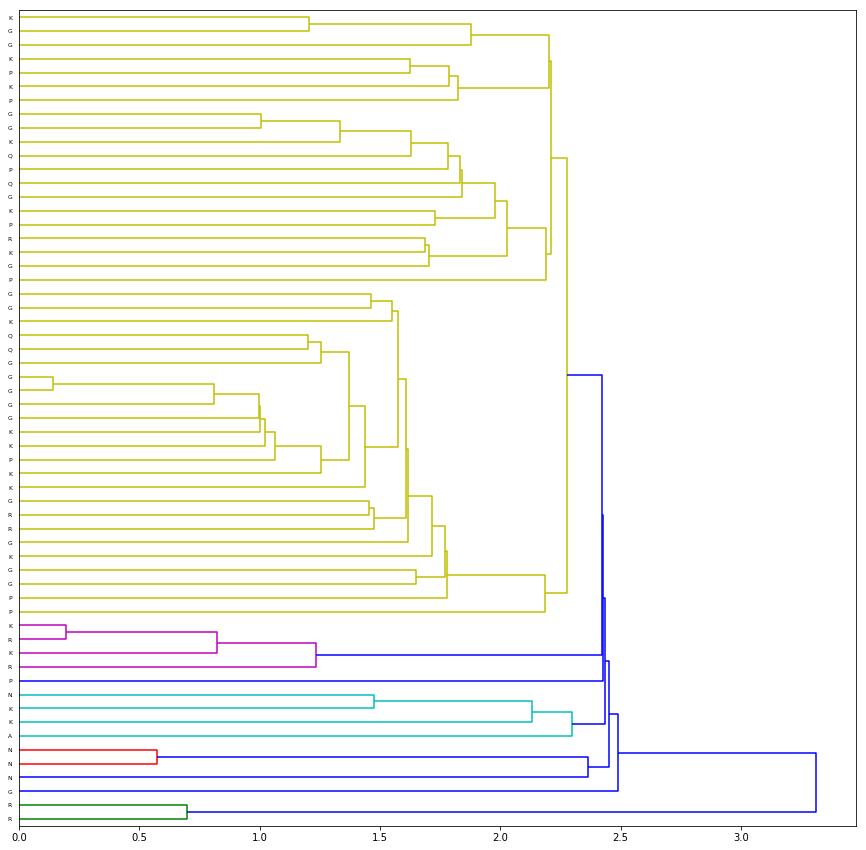

In [13]:
from scipy.cluster import hierarchy
figure(num=None, figsize=(15, 15))
names = mfr_data['mfr']
Z = hierarchy.linkage(data2.as_matrix(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

#### Complete Link (MAX)

/home/mukit/anaconda3/envs/ml_course/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


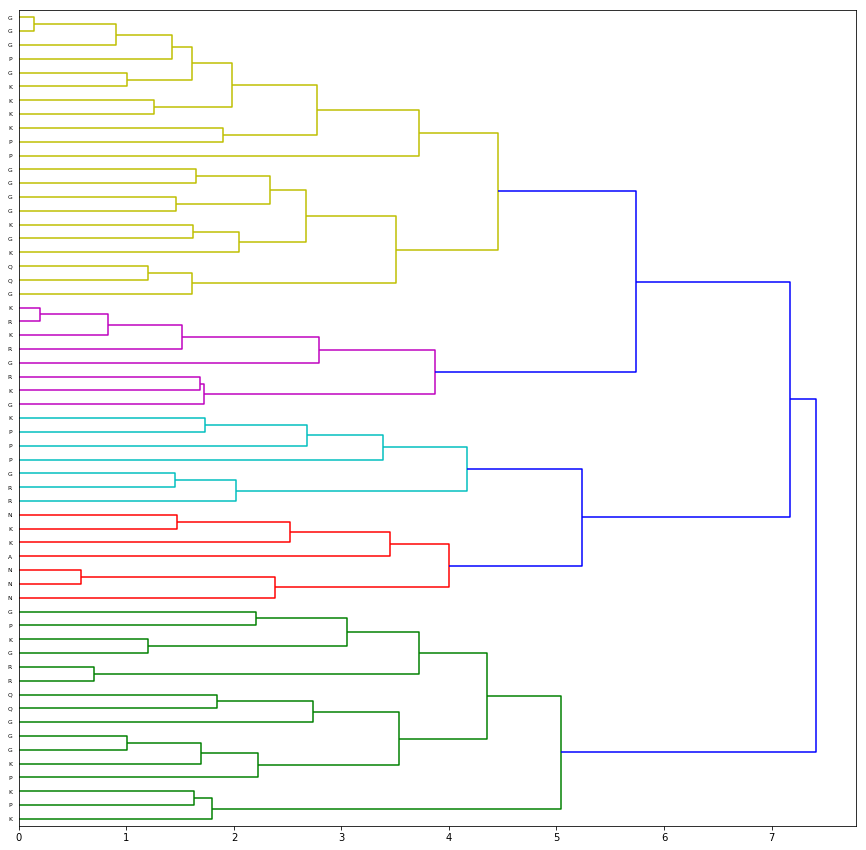

In [14]:
figure(num=None, figsize=(15, 15))
Z = hierarchy.linkage(data2.as_matrix(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

#### Group Average

/home/mukit/anaconda3/envs/ml_course/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


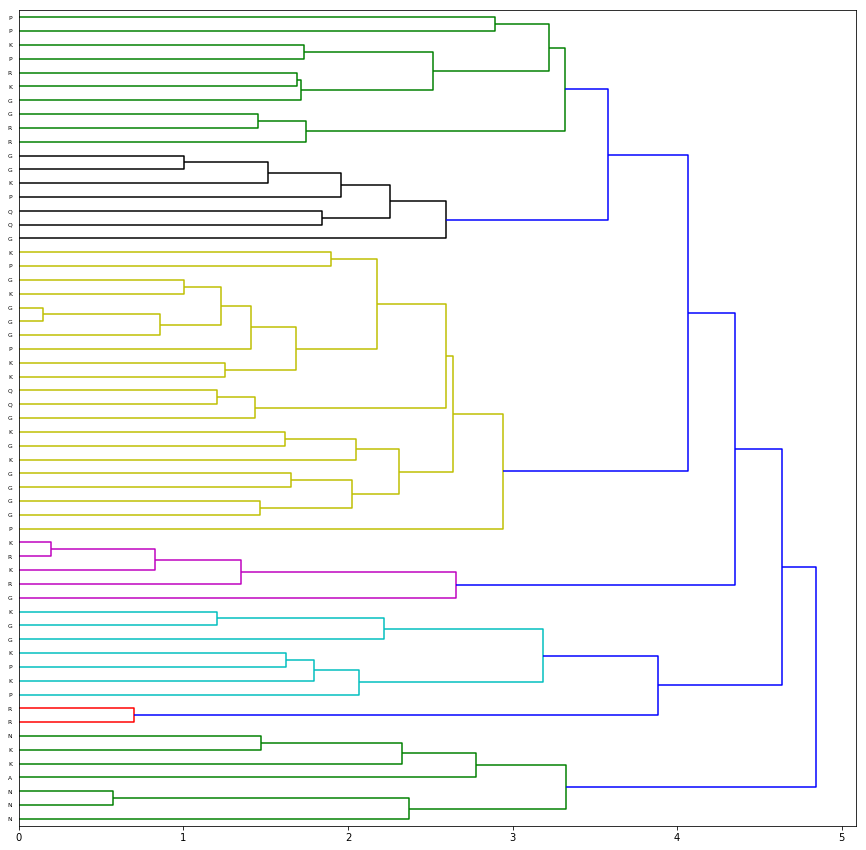

In [15]:
figure(num=None, figsize=(15, 15))
Z = hierarchy.linkage(data2.as_matrix(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

#### Inference
It is difficult to make sense of the clustering from these diagrams.